# Mini Project 2

### Fraud Detection on Bank Payments

### Business Problem : 

"Our bank has experienced a significant increase in fraudulent payments over the past year. We need to identify patterns in our transaction data that indicate fraudulent activity in order to prevent losses and protect our customers. We have a dataset of past bank transactions, including information about the amount and type of transaction, as well as information about the customer. Can we use logistic regression to predict whether a given transaction is fraudulent or not?"

*Data**
As we can see in the first rows below the dataset has 9 feature columns and a target column. 
The feature columms are :
* **Step**: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.
* **Customer**: This feature represents the customer id
* **zipCodeOrigin**: The zip code of origin/source.
* **Merchant**: The merchant's id
* **zipMerchant**: The merchant's zip code
* **Age**: Categorized age 
    * 0: <= 18, 
    * 1: 19-25, 
    * 2: 26-35, 
    * 3: 36-45,
    * 4: 46:55,
    * 5: 56:65,
    * 6: > 65
    * U: Unknown
* **Gender**: Gender for customer
     * E : Enterprise,
     * F: Female,
     * M: Male,
     * U: Unknown
* **Category**: Category of the purchase. I won't write all categories here, we'll see them later in the analysis.
* **Amount**: Amount of the purchase
* **Fraud**: Target variable which shows if the transaction fraudulent(1) or benign(0)

Description:

The purpose of the Mini Project is to reinforce skills that
have been covered in recent modules. Select a
data set and analyse it using the techniques learned in recent modules. Prepare
and present a 10-minute powerpoint presentation and a 5-minute jupyter notebook presentation in class on 28th June (Tues).


Things to
consider:

1.
Application of your choice

2. 
Data set that is not tidy

3.
Feature selection

4.
Visualization

5.
Machine learning models (at least 3)

6.
Performance metric

7.
Hyperparameter tuning

8.
Comparison between models

-----------

Rubric:




Explanation of the business context behind the
dataset
Quality of presentation - engaging, well structured,
not too short or too long
Quality of the notebook - code well documented, runs
correctly
Time-management - please keep strictly to the time
given

Source: https://www.kaggle.com/code/turkayavci/fraud-detection-on-bank-payments/notebook#Fraud-Detection-on-Bank-Payments

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFE
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTETomek
from sklearn.svm import SVC

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

### Data

In [2]:
fraud_csv = r"C:\Users\jolen\IOD-Fulltime_5_Dec_2022\Mini Projects\Mini Project 2\fraud.csv"
fraud_csv = pd.read_csv(fraud_csv)

### EDA

In [3]:
# There are 594643 rows and 10 columns
fraud_csv.shape

(594643, 10)

In [4]:
fraud_csv.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [5]:
fraud_csv.tail()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


In [6]:
fraud_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [7]:
nunique = fraud_csv.nunique()

In [8]:
fraud_csv.sample(20)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
154738,54,'C1332125345','2','F','28007','M348934600','28007','es_transportation',46.14,0
6078,2,'C287533643','3','M','28007','M1823072687','28007','es_transportation',42.79,0
156948,55,'C1881279773','4','F','28007','M1823072687','28007','es_transportation',14.86,0
45119,17,'C1937615372','4','F','28007','M85975013','28007','es_food',28.89,0
555387,169,'C373733261','4','F','28007','M1823072687','28007','es_transportation',36.02,0
556262,169,'C632176173','2','M','28007','M1823072687','28007','es_transportation',72.26,0
211414,72,'C2120296918','4','F','28007','M1823072687','28007','es_transportation',38.76,0
110437,40,'C620327304','4','F','28007','M348934600','28007','es_transportation',53.41,0
575713,174,'C1369559766','3','M','28007','M348934600','28007','es_transportation',14.81,0
372967,119,'C792765429','5','M','28007','M1823072687','28007','es_transportation',20.31,0


In [9]:
fraud_csv.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
step,594643.000000,94.986827,51.053632,0.000000,52.000000,97.000000,139.000000,179.000000
amount,594643.000000,37.890135,111.402831,0.000000,13.740000,26.900000,42.540000,8329.960000
fraud,594643.000000,0.012108,0.109369,0.000000,0.000000,0.000000,0.000000,1.000000


### Data Wrangling

Check column names in order

In [10]:
# No actions needed on column names
fraud_csv.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

Check columns relevent to use

In [11]:
fraud_csv.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [12]:
fraud_csv.nunique()

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

In [13]:
# Remove zipcodeOri , zipMerchant since there is only 1 unique & remove step which does not serve a purpose here

fraud_csv.drop(['zipcodeOri','zipMerchant','step'],axis=1, inplace=True)

In [14]:
fraud_csv.columns

Index(['customer', 'age', 'gender', 'merchant', 'category', 'amount', 'fraud'], dtype='object')

In [15]:
fraud_csv.sample(5)

,customer,age,gender,merchant,category,amount,fraud
454513,'C466769207','2','F','M85975013','es_food',29.57,0
594270,'C582479974','2','M','M855959430','es_hyper',47.58,0
97797,'C189823798','5','M','M209847108','es_wellnessandbeauty',22.29,0
184436,'C1060120913','1','M','M1823072687','es_transportation',22.39,0
406892,'C1039035065','5','F','M1823072687','es_transportation',38.90,0


### Demographics

In [16]:
fraud_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   customer  594643 non-null  object 
 1   age       594643 non-null  object 
 2   gender    594643 non-null  object 
 3   merchant  594643 non-null  object 
 4   category  594643 non-null  object 
 5   amount    594643 non-null  float64
 6   fraud     594643 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 31.8+ MB


In [17]:
fraud_csv.sample(5)

,customer,age,gender,merchant,category,amount,fraud
92230,'C474891377','4','M','M348934600','es_transportation',23.30,0
519164,'C1263107170','2','F','M1823072687','es_transportation',33.74,0
578738,'C495652708','2','M','M1823072687','es_transportation',4.82,0
505201,'C956414645','2','F','M1823072687','es_transportation',16.90,0
342657,'C2144163136','1','F','M1823072687','es_transportation',40.84,0


In [18]:
# find categorical variables

categorical = [var for var in fraud_csv.columns if fraud_csv[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['customer', 'age', 'gender', 'merchant', 'category']


In [19]:
# view frequency of categorical variables

for var in categorical: 
    
    print(fraud_csv[var].value_counts())

'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1345586046'      6
'C1156745710'      6
'C1404665203'      5
'C1743702978'      5
'C1809646275'      5
Name: customer, Length: 4112, dtype: int64
'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64
'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64
'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M6

In [20]:
# check columns in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(fraud_csv[var].unique()), ' labels')

customer  contains  4112  labels
age  contains  8  labels
gender  contains  4  labels
merchant  contains  50  labels
category  contains  15  labels


Summary of categorical variables

1. Customers ID has 4112 unique customers, which will pose problems when in ML if required

2. Age has been graded with different groups from 0 to 6 with 1178 unknowns

3. Gender is  grouped to 4 groups Enterprise, F: Female, M: Male, U: Unknown. With 515 unknowns

4. Merchant has 50 unique merchants

5. Category is a cardinal category item with 15 different catergories

### Check any null values in catergoical columns

In [21]:
fraud_csv[categorical].isnull().sum()

customer    0
age         0
gender      0
merchant    0
category    0
dtype: int64

In [22]:
fraud_csv[categorical].sample(5)

,customer,age,gender,merchant,category
297581,'C416655198','2','F','M1823072687','es_transportation'
233209,'C200459252','1','M','M1823072687','es_transportation'
93837,'C150820973','2','F','M348934600','es_transportation'
409656,'C1525581466','1','F','M1823072687','es_transportation'
277079,'C307655955','2','F','M348934600','es_transportation'


In [23]:
# Find columns that contain 0
cols_with_0 = fraud_csv.columns[(fraud_csv == '0').any()].tolist()
cols_with_0

[]

In [24]:
# customer, merchant & catergory change to string dtypes

fraud_csv[['customer', 'merchant','category']] = fraud_csv[['customer', 'merchant','category']].astype(str)

In [25]:
# under category replace es_ with nothing
fraud_csv['category'] = fraud_csv['category'].str.replace("es_","")
fraud_csv['category']

0         'transportation'
1         'transportation'
2         'transportation'
3         'transportation'
4         'transportation'
                ...       
594638    'transportation'
594639    'transportation'
594640           'fashion'
594641    'transportation'
594642    'transportation'
Name: category, Length: 594643, dtype: object

In [26]:
fraud_csv[categorical].sample(5)

,customer,age,gender,merchant,category
389980,'C1350963410','5','F','M50039827','health'
50319,'C839839520','2','F','M348934600','transportation'
455147,'C1927849279','2','F','M1823072687','transportation'
80606,'C1520919939','4','M','M151143676','barsandrestaurants'
492084,'C989321907','4','M','M1823072687','transportation'


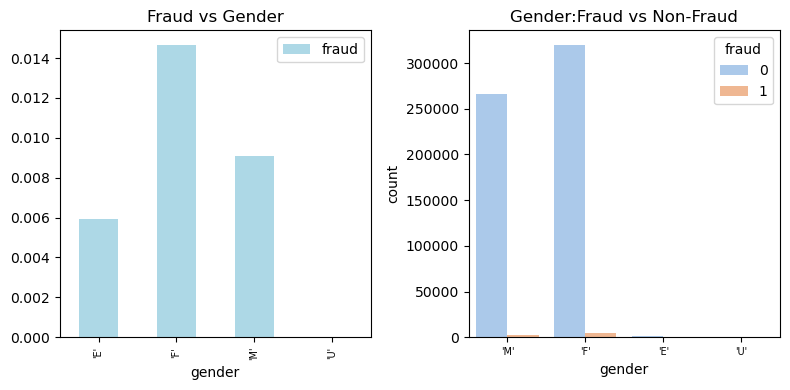

In [27]:
f,ax=plt.subplots(1,2,figsize=(8, 4))

fraud_csv[['gender','fraud']].groupby(['gender']).mean().plot.bar(ax=ax[0], color='lightblue')
ax[0].set_title('Fraud vs Gender')


sns.countplot(x = 'gender',hue='fraud',data=fraud_csv,ax=ax[1], palette="pastel")
ax[1].set_title('Gender:Fraud vs Non-Fraud')
    
plt.tight_layout()
plt.show()

In [28]:
pd.crosstab(fraud_csv.gender,fraud_csv.fraud,margins=True).style.background_gradient(cmap='Blues')

fraud,0,1,All
gender,,,
'E',1171,7,1178
'F',319807,4758,324565
'M',265950,2435,268385
'U',515,0,515
All,587443,7200,594643


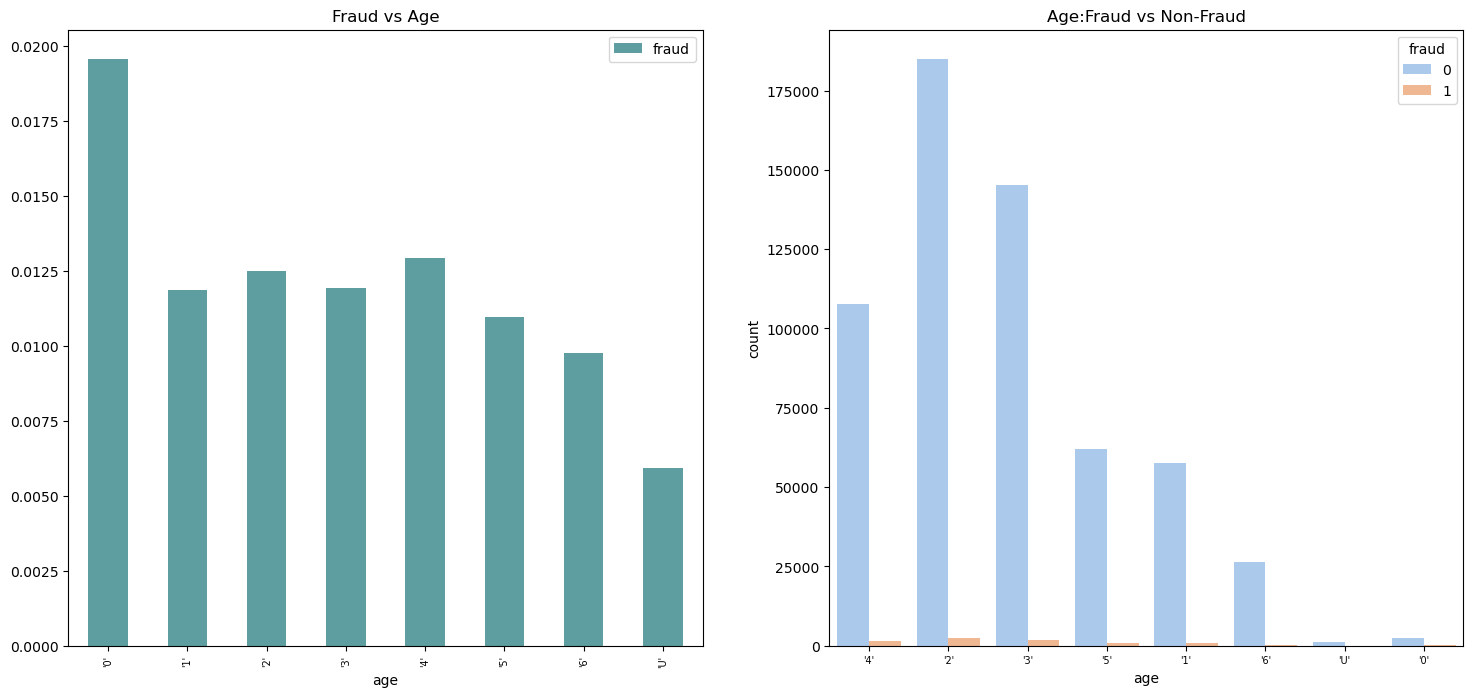

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))

fraud_csv[['age','fraud']].groupby(['age']).mean().plot.bar(ax=ax[0], color='cadetblue')
ax[0].set_title('Fraud vs Age')

sns.countplot(x = 'age',hue='fraud',data=fraud_csv,ax=ax[1],  palette="pastel")
ax[1].set_title('Age:Fraud vs Non-Fraud')
plt.show()

In [30]:
pd.crosstab(fraud_csv.age,fraud_csv.fraud,margins=True).style.background_gradient(cmap='Blues')

fraud,0,1,All
age,,,
'0',2404,48,2452
'1',57442,689,58131
'2',184966,2344,187310
'3',145376,1755,147131
'4',107615,1410,109025
'5',61956,686,62642
'6',26513,261,26774
'U',1171,7,1178
All,587443,7200,594643


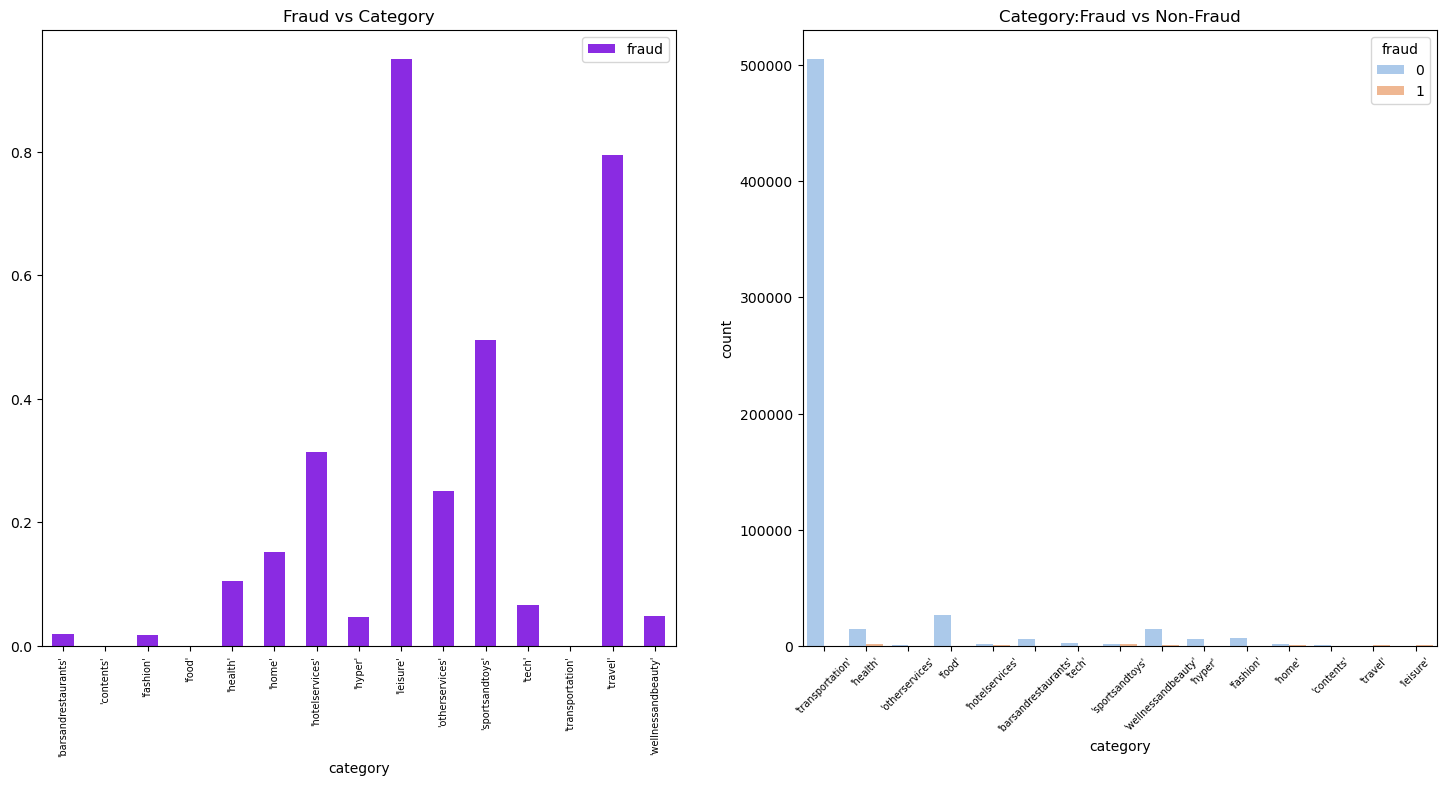

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))

fraud_csv[['category','fraud']].groupby(['category']).mean().plot.bar(ax=ax[0], color = 'blueviolet')
ax[0].set_title('Fraud vs Category')


ax[1].set_xticks(range(len(fraud_csv['category'].unique())))
ax[1].set_xticklabels(fraud_csv['category'].unique(), rotation=45)

sns.countplot(x = 'category',hue='fraud',data=fraud_csv,ax=ax[1], palette="pastel")

ax[1].set_title('Category:Fraud vs Non-Fraud')
plt.show()

In [32]:
pd.crosstab(fraud_csv.category,fraud_csv.fraud,margins=True).style.background_gradient(cmap='Blues')

fraud,0,1,All
category,,,
'barsandrestaurants',6253,120,6373
'contents',885,0,885
'fashion',6338,116,6454
'food',26254,0,26254
'health',14437,1696,16133
'home',1684,302,1986
'hotelservices',1196,548,1744
'hyper',5818,280,6098
'leisure',25,474,499


In [33]:
pd.crosstab([fraud_csv.category,fraud_csv.age],[fraud_csv.gender,fraud_csv.fraud],margins=True).style.background_gradient(cmap='Blues')

In [34]:
pd.crosstab([fraud_csv.age,fraud_csv.category],[fraud_csv.gender,fraud_csv.fraud],margins=True).style.background_gradient(cmap='Blues')

In [35]:
pd.crosstab([fraud_csv.age,fraud_csv.category],[fraud_csv.gender,fraud_csv.fraud],margins=True).T.style.background_gradient(cmap='Blues')

### Check numerical columns

In [36]:
# find numerical variables

numerical = [var for var in fraud_csv.columns if fraud_csv[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 2 numerical variables

The numerical variables are : ['amount', 'fraud']


In [37]:
fraud_csv[numerical].head()

,amount,fraud
0,4.55,0
1,39.68,0
2,26.89,0
3,17.25,0
4,35.72,0


In [38]:
fraud_csv[numerical].describe().style.background_gradient(cmap = "Blues")

,amount,fraud
count,594643.000000,594643.000000
mean,37.890135,0.012108
std,111.402831,0.109369
min,0.000000,0.000000
25%,13.740000,0.000000
50%,26.900000,0.000000
75%,42.540000,0.000000
max,8329.960000,1.000000


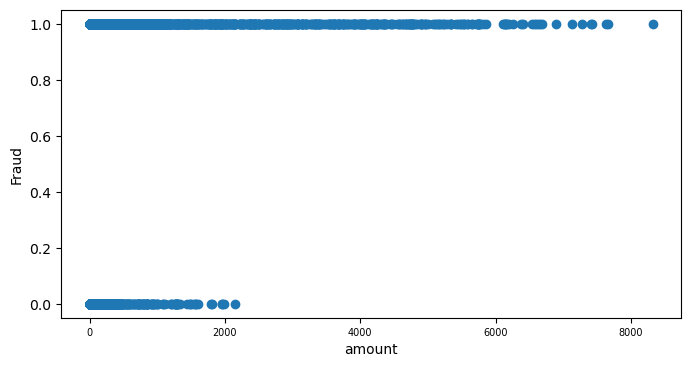

In [39]:
# no correlation between amount & fraud
plt.scatter(fraud_csv['amount'], fraud_csv['fraud'])
plt.xlabel('amount')
plt.ylabel('Fraud')
plt.show()

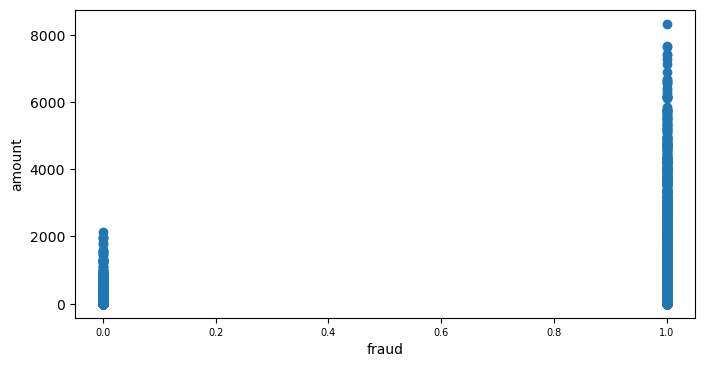

In [40]:
# no correlation between amount & fraud
plt.scatter(fraud_csv['fraud'], fraud_csv['amount'])
plt.xlabel('fraud')
plt.ylabel('amount')
plt.show()

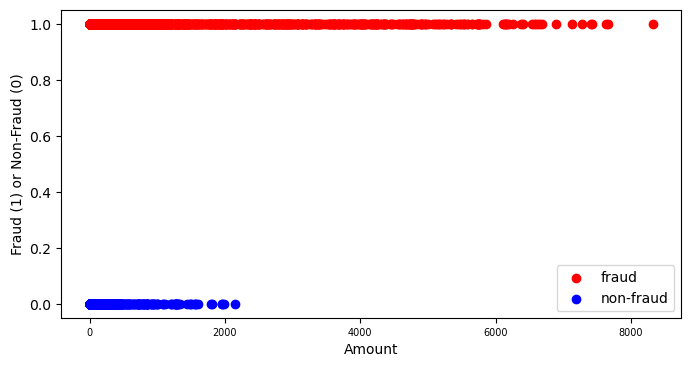

In [41]:
# Group the data by fraud and create a scatter plot of amount- still no correlation
grouped = fraud_csv.groupby('fraud')
fraud = grouped.get_group(1)
non_fraud = grouped.get_group(0)
plt.scatter(fraud['amount'], [1 for i in range(len(fraud))], c='red', label='fraud')
plt.scatter(non_fraud['amount'], [0 for i in range(len(non_fraud))], c='blue', label='non-fraud')
plt.xlabel('Amount')
plt.ylabel('Fraud (1) or Non-Fraud (0)')
plt.legend()
plt.show()

### Checking for outliers in amount columns

<AxesSubplot: xlabel='fraud', ylabel='amount'>

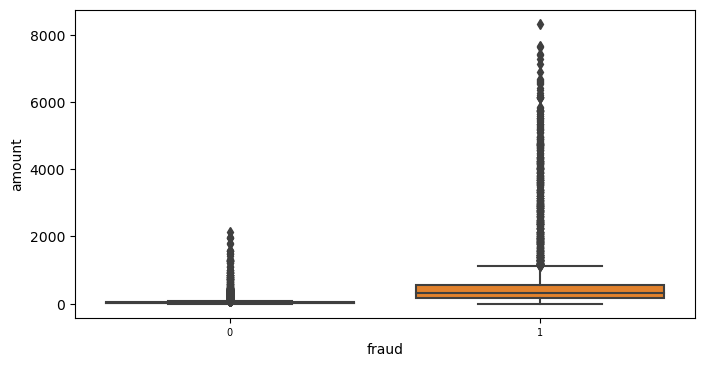

In [42]:
sns.boxplot(data=fraud_csv, x='fraud', y = 'amount' )

In [43]:
# outliner for fraud only using zscore will be 3188 rows out of 7200 fraud cases (almost half)
fraud_df = fraud_csv[fraud_csv['fraud'] == 1]  # Filter the fraud records only
mean = fraud_csv['amount'].mean()
std = fraud_csv['amount'].std()
z_scores = (fraud_csv['amount'] - mean) / std
outliers = fraud_csv[z_scores.abs() > 3]
print(outliers)

             customer  age gender       merchant             category  amount  \
853      'C583110837'  '3'    'M'   'M480139044'             'health'  667.09   
854     'C1079254393'  '1'    'F'   'M480139044'             'health'  520.50   
921      'C330615170'  '2'    'F'  'M1535107174'  'wellnessandbeauty'  451.92   
1005    'C1685492470'  '2'    'F'   'M980657600'      'sportsandtoys'  764.00   
1119    'C1764447156'  '3'    'F'  'M2122776122'               'home'  707.22   
...               ...  ...    ...            ...                  ...     ...   
593364   'C475928775'  '4'    'F'   'M480139044'             'health'  814.03   
593407  'C2033917877'  '3'    'M'   'M480139044'             'health'  695.53   
593567  'C1193034305'  '4'    'F'  'M2011752106'      'hotelservices'  491.56   
593987   'C524035200'  '2'    'M'  'M1872033263'               'home'  373.36   
594026   'C245117318'  '3'    'F'  'M1748431652'  'wellnessandbeauty'  521.84   

        fraud  
853        

In [44]:
# I will not make changes to the outliers as this may caused the incorrect prediction and outlier for huge amount may also be cause for fraud cases
fraud_csv.describe().style.background_gradient(cmap = "Blues")

,amount,fraud
count,594643.000000,594643.000000
mean,37.890135,0.012108
std,111.402831,0.109369
min,0.000000,0.000000
25%,13.740000,0.000000
50%,26.900000,0.000000
75%,42.540000,0.000000
max,8329.960000,1.000000


In [45]:
fraud_csv.describe().style.background_gradient(cmap = "Blues")

,amount,fraud
count,594643.000000,594643.000000
mean,37.890135,0.012108
std,111.402831,0.109369
min,0.000000,0.000000
25%,13.740000,0.000000
50%,26.900000,0.000000
75%,42.540000,0.000000
max,8329.960000,1.000000


In [46]:
for var in numerical: 
    
    print(fraud_csv[var].value_counts())

26.67     146
14.93     146
17.57     145
17.26     143
16.12     143
         ... 
222.85      1
99.86       1
164.50      1
112.54      1
190.31      1
Name: amount, Length: 23767, dtype: int64
0    587443
1      7200
Name: fraud, dtype: int64


Summary of numerical variables

1. Fraud is the predictor variable with fraudulent(1) with 7200 counts and benign(0) with 587443 counts
2. Amount has a range from 0 to max 8330 with mean of 27 
3. Step are steps for 6 mths range with continous variable

### Check any null values in categorical columns

In [47]:
# Check null in numercial columns
fraud_csv[numerical].isnull().sum()

amount    0
fraud     0
dtype: int64

### Understanding more on Fraud column

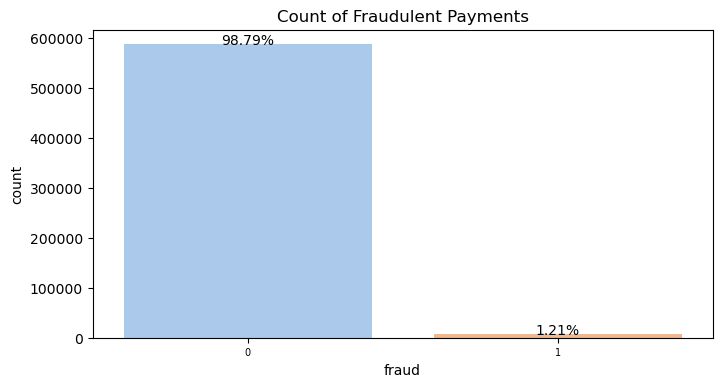

Number of non-fradulent cases:  587443
Number of fradulent cases:  7200


In [48]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = fraud_csv.loc[fraud_csv.fraud == 1] 
df_non_fraud = fraud_csv.loc[fraud_csv.fraud == 0]

sns.countplot(x="fraud",data=fraud_csv, palette="pastel")
plt.title("Count of Fraudulent Payments")

# Get the count of fraudulent and non-fraudulent cases
non_fraud_count = df_non_fraud.fraud.count()
fraud_count = df_fraud.fraud.count()
total = non_fraud_count + fraud_count

# Calculate the percentage of fraudulent and non-fraudulent cases
non_fraud_percent = non_fraud_count/total * 100
fraud_percent = fraud_count/total * 100

# Annotate the percentage on the graph
for i, v in enumerate([non_fraud_count, fraud_count]):
    plt.text(i, v + 3, str(round(v/total * 100, 2)) + '%', ha='center')

plt.show()

print("Number of non-fradulent cases: ",df_non_fraud.fraud.count())
print("Number of fradulent cases: ",df_fraud.fraud.count())
#print(data.fraud.value_counts()) # does the same thing above



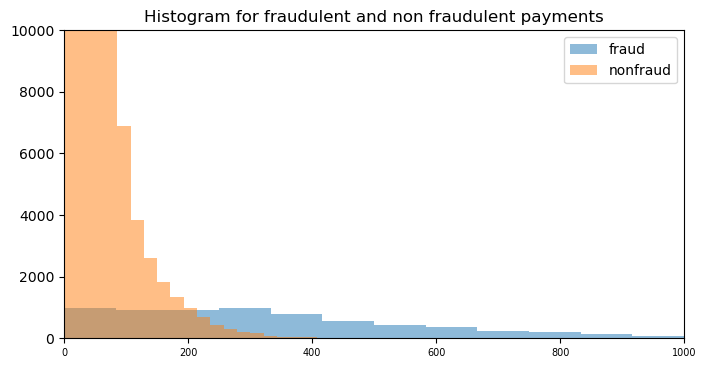

In [49]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.5, label='fraud',bins=100)
plt.hist(df_non_fraud.amount, alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram for fraudulent and non fraudulent payments")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

In [50]:
fraud_csv.columns

Index(['customer', 'age', 'gender', 'merchant', 'category', 'amount', 'fraud'], dtype='object')

### Further analysis on the data demographics

In [51]:
# Create a function for repeated value_counts
def value_count_columns(column):
    a = fraud_csv[column].value_counts().reset_index()
    return a

In [52]:
# value_count for category
category = value_count_columns('category')
category.sort_values(by=['index'], axis = 0).style.background_gradient(cmap = "Blues")

,index,category
5,'barsandrestaurants',6373
12,'contents',885
4,'fashion',6454
1,'food',26254
2,'health',16133
9,'home',1986
10,'hotelservices',1744
6,'hyper',6098
14,'leisure',499
11,'otherservices',912


In [53]:
# value_count for age
category = value_count_columns('age')
category.sort_values(by=['index'], axis = 0).style.background_gradient(cmap = "Blues")

,index,age
6,'0',2452
4,'1',58131
0,'2',187310
1,'3',147131
2,'4',109025
3,'5',62642
5,'6',26774
7,'U',1178


In [54]:
# value_count for gender
category = value_count_columns('gender')
category.sort_values(by=['index'], axis = 0).style.background_gradient(cmap = "Blues")

,index,gender
2,'E',1178
0,'F',324565
1,'M',268385
3,'U',515


In [55]:
# value_count for customers
category = value_count_columns('customer')
category.sort_values(by=['index'], axis = 0).style.background_gradient(cmap = "Blues")

,index,customer
3064,'C1000148617',131
3370,'C100045114',109
3539,'C1000699316',94
3950,'C1001065306',30
3069,'C1002658784',131
2134,'C1002759277',164
2263,'C1004109477',162
180,'C1004300450',179
3657,'C1004532392',82
252,'C1005126300',178


In [56]:
# value_count for merchants
category = value_count_columns('merchant')
category.sort_values(by=['index'], axis = 0).style.background_gradient(cmap = "Blues")

,index,merchant
3,'M1053599405',6821
48,'M117188757',21
15,'M1198415165',1580
40,'M1294758098',191
28,'M1313686961',527
30,'M1352454843',370
44,'M1353266412',78
22,'M1400236507',776
39,'M1416436880',220
4,'M151143676',6373


In [57]:
# Group by category and reflect amount 
fraud_csv_cat=fraud_csv.groupby(['category'])['amount'].sum().reset_index(name='Amt in Category').sort_values(by= 'Amt in Category', ascending= True)


In [58]:
fraud_csv_cat.style.background_gradient(cmap = "Blues")

,category,Amt in Category
1,'contents',39424.600000
9,'otherservices',123923.950000
8,'leisure',144166.740000
0,'barsandrestaurants',276977.040000
7,'hyper',280327.630000
11,'tech',286646.610000
5,'home',329022.300000
6,'hotelservices',358591.250000
2,'fashion',423812.510000
10,'sportsandtoys',863292.550000


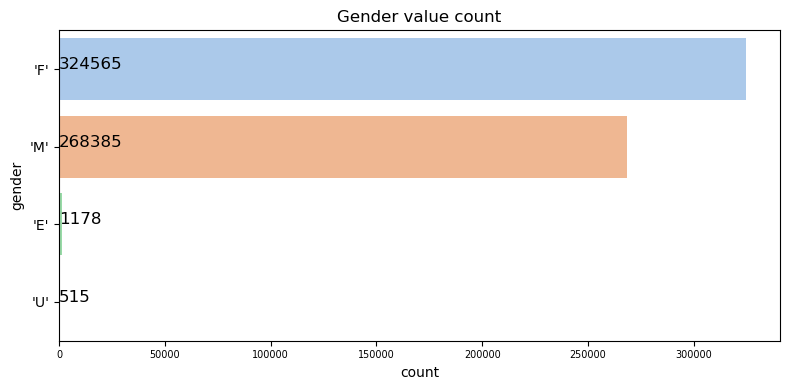

In [59]:
ax = sns.countplot(y='gender', data=fraud_csv, order=fraud_csv['gender'].value_counts().index[:5],  palette="pastel")

for i, v in enumerate(fraud_csv['gender'].value_counts().sort_values(ascending=False).values[:8]):
    ax.text(0.8,i,v,color='black',fontsize=12)

plt.title('Gender value count')
plt.tight_layout()

In [60]:
# Group by category and reflect amount 
fraud_csv_amt =fraud_csv.groupby(['category'])['amount'].mean().reset_index(name='Mean Amt in Category').sort_values(by= 'Mean Amt in Category', ascending= True)


In [61]:
fraud_csv_amt

,category,Mean Amt in Category
12,'transportation',26.958187
3,'food',37.070405
0,'barsandrestaurants',43.461014
1,'contents',44.547571
7,'hyper',45.970421
14,'wellnessandbeauty',65.511221
2,'fashion',65.666642
11,'tech',120.947937
4,'health',135.621367
9,'otherservices',135.881524


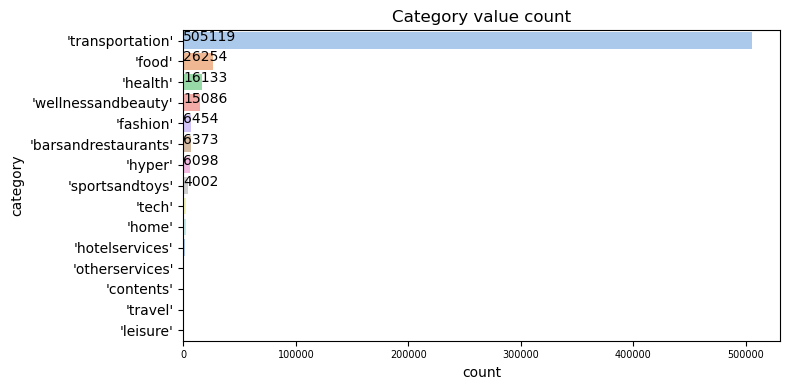

In [62]:
ax = sns.countplot(y='category', data=fraud_csv, order=fraud_csv['category'].value_counts().index[:16], palette="pastel")

for i, v in enumerate(fraud_csv['category'].value_counts().sort_values(ascending=False).values[:8]):
    ax.text(0.8,i,v,color='black',fontsize=10)

plt.title('Category value count')    
plt.tight_layout()

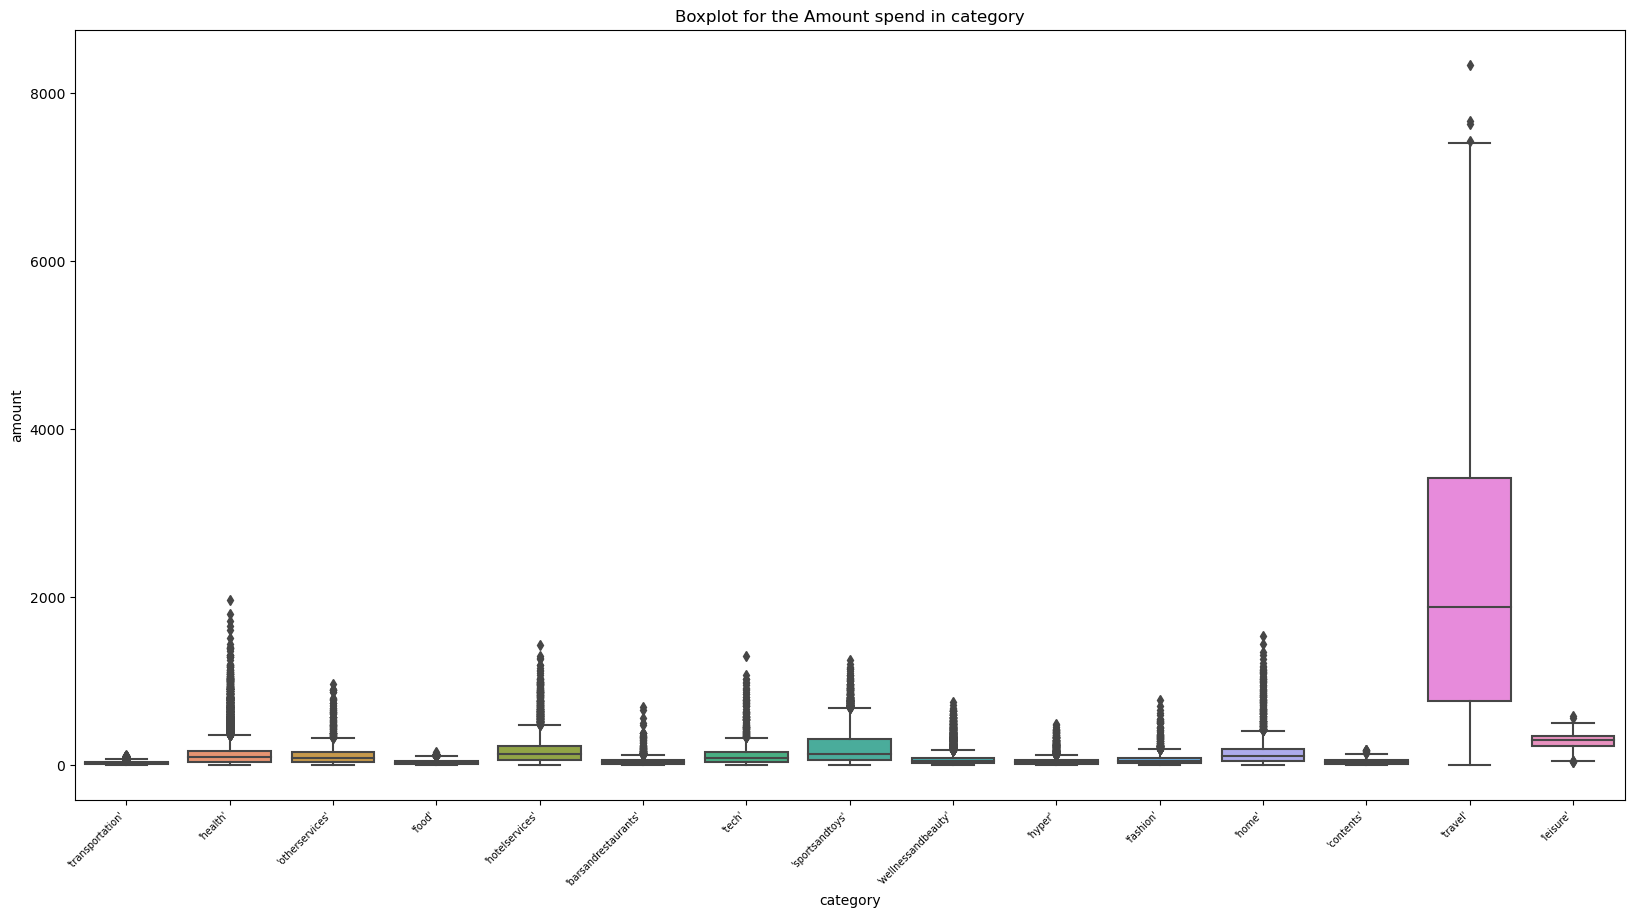

In [63]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.figure(figsize=(20,10))
sns.boxplot(x=fraud_csv.category,y=fraud_csv.amount)
plt.xticks(
    rotation=45, 
    horizontalalignment='right')
plt.title("Boxplot for the Amount spend in category")

plt.show()

In [64]:
fraud_csv.groupby('category')[['amount','fraud']].mean().style.background_gradient(cmap = 'Blues')

,amount,fraud
category,,
'barsandrestaurants',43.461014,0.018829
'contents',44.547571,0.000000
'fashion',65.666642,0.017973
'food',37.070405,0.000000
'health',135.621367,0.105126
'home',165.670846,0.152064
'hotelservices',205.614249,0.314220
'hyper',45.970421,0.045917
'leisure',288.911303,0.949900


In [65]:
# Create two dataframes with fraud and non-fraud data 
df2 = pd.concat([df_fraud.groupby('category')['amount'].mean(),df_non_fraud.groupby('category')['amount'].mean(),\
           fraud_csv.groupby('category')['fraud'].mean()*100],keys=["Non-Fraudulent","Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

In [66]:
df2.style.background_gradient(cmap = "Blues")

,Non-Fraudulent,Fraudulent,Percent(%)
category,,,
'barsandrestaurants',164.092667,41.145997,1.882944
'hyper',169.255429,40.037145,4.591669
'wellnessandbeauty',229.422535,57.320219,4.759380
'fashion',247.008190,62.347674,1.797335
'leisure',300.286878,73.230400,94.989980
'otherservices',316.469605,75.685497,25.000000
'sportsandtoys',345.366811,88.502738,49.525237
'health',407.031338,103.737228,10.512614
'tech',415.274114,99.924638,6.666667


In [67]:
# Create two dataframes with fraud and non-fraud data 
df12 = pd.concat([df_fraud.groupby('age')['amount'].mean(),df_non_fraud.groupby('age')['amount'].mean(),\
           fraud_csv.groupby('age')['fraud'].mean()*100],keys=["Non-Fraudulent","Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

In [68]:
df12.style.background_gradient(cmap = "Blues")

,Non-Fraudulent,Fraudulent,Percent(%)
age,,,
'U',473.458571,34.016336,0.594228
'5',489.418017,31.410537,1.095112
'1',499.757692,31.986634,1.185254
'4',522.400915,31.857414,1.293281
'3',532.428758,31.909451,1.192815
'6',545.402682,31.859470,0.974826
'2',552.212432,31.846593,1.251401
'0',657.278125,34.409713,1.957586


In [69]:
# Create two dataframes with fraud and non-fraud data 
df12 = pd.concat([df_fraud.groupby('age')['amount'].mean(),df_non_fraud.groupby('age')['amount'].mean(),\
           fraud_csv.groupby('age')['fraud'].mean()*100],keys=["Non-Fraudulent","Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

In [70]:
# Looks like fraud occurs more in ages equal and below 18(0th category). Can it be because of fraudsters thinking it would be less consequences if they show their age younger, or maybe they really are young.
df11 =  (fraud_csv.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent')

In [71]:
df11.style.background_gradient(cmap = "Blues")

,Age,Fraud Percent
7,'U',0.594228
6,'6',0.974826
5,'5',1.095112
1,'1',1.185254
3,'3',1.192815
2,'2',1.251401
4,'4',1.293281
0,'0',1.957586


### Class amount column

In [72]:
# Check which column has the many uniques values
fraud_csv.nunique()

customer     4112
age             8
gender          4
merchant       50
category       15
amount      23767
fraud           2
dtype: int64

In [73]:
# Create a new dataframe to class amount and not affect original data

fraud_amt= fraud_csv.copy()

In [74]:
# Find quartiles in the amount
fraud_amt['amount'].quantile([0.25,0.5,0.75,1]).round(2)

0.25      13.74
0.50      26.90
0.75      42.54
1.00    8329.96
Name: amount, dtype: float64

In [75]:
#create cost class
def create_amt_class(x):
    if x > 42.54:
        cost_class = 'High Amt'
    elif x > 26.90 and x <= 42.53:
        cost_class = 'Avg Amt'
    else:
        cost_class = 'Low Amt'
    return cost_class

fraud_amt['amount'] = fraud_amt['amount'].apply(create_amt_class)
fraud_amt['amount']

0          Low Amt
1          Avg Amt
2          Low Amt
3          Low Amt
4          Avg Amt
            ...   
594638     Low Amt
594639    High Amt
594640     Low Amt
594641     Low Amt
594642     Avg Amt
Name: amount, Length: 594643, dtype: object

In [77]:
# Create function to compare 
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With fraud
    '''
    _agg = {
        'age': 'count'
    }
    _groupby = ['fraud', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    
    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6), cmap='coolwarm' )
    
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.title(feature)
    plt.xlabel('Fraud')
    plt.ylabel(feature)
    plt.xticks(np.arange(2), ('No', 'Yes'))  
    plt.show();

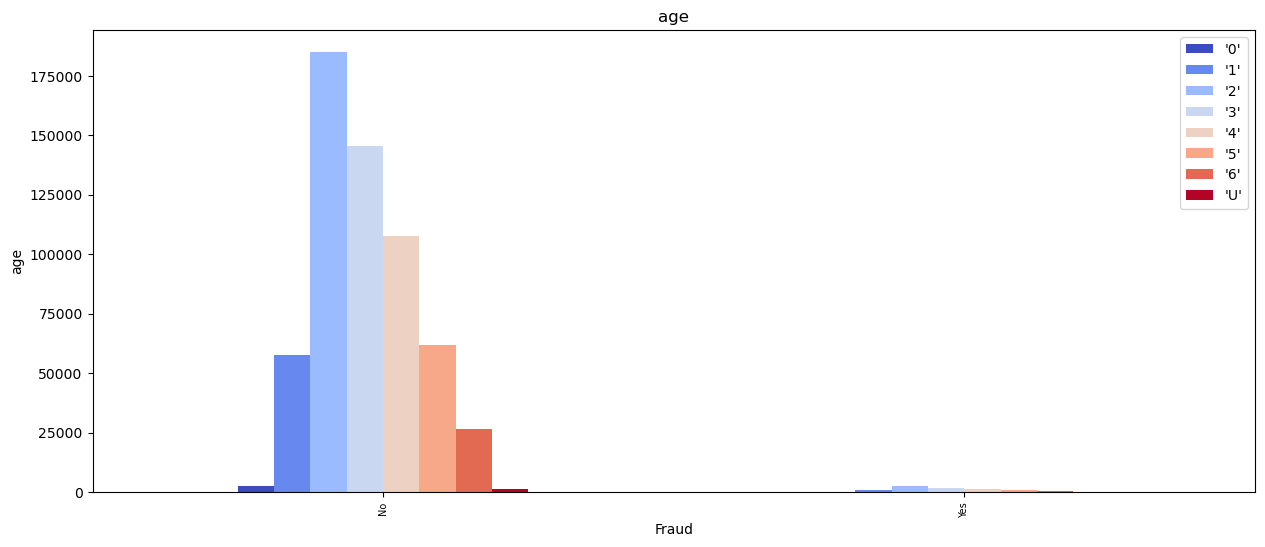

In [78]:
# Fraud vs Age
bar_charts(fraud_csv, 'age')
plt.show()
# Age group 2 has the highest non fraud column

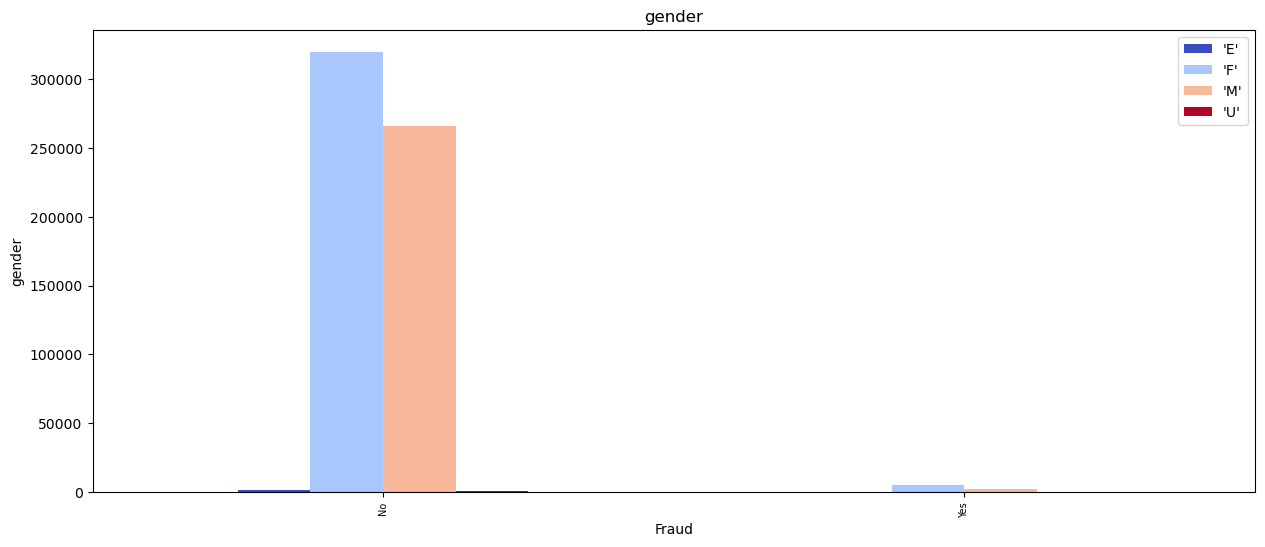

In [79]:
# Fraud vs gender
bar_charts(fraud_csv, 'gender')
plt.show()
# Female has the highest non fraud column and have a higher column for fraud

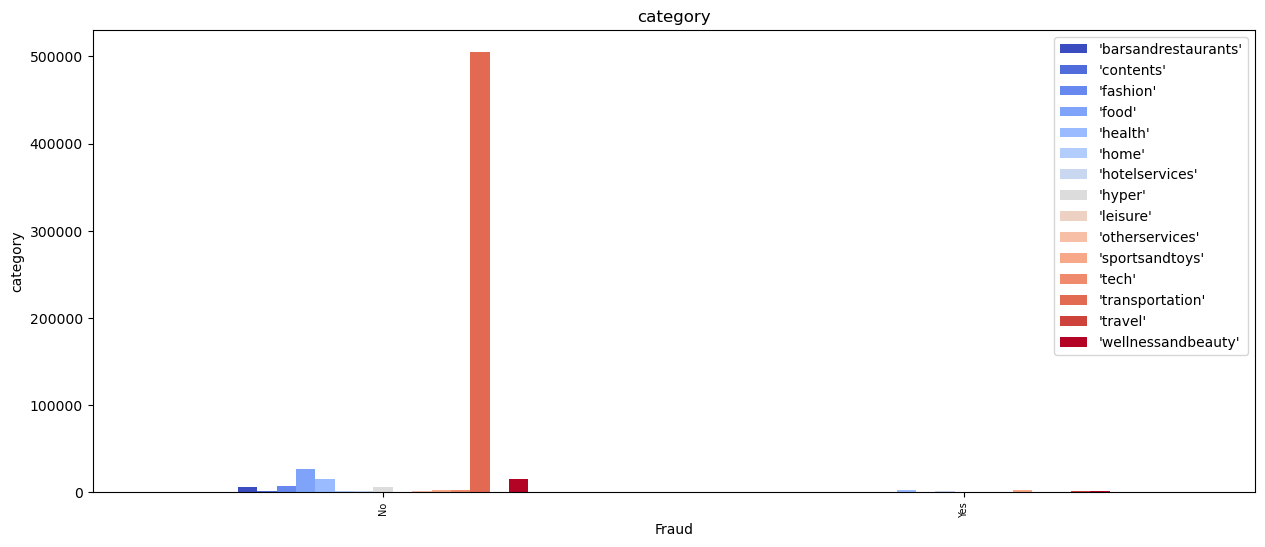

In [80]:
# Fraud vs category
bar_charts(fraud_csv, 'category')
plt.show()
# Transport has the higest in non fraud column

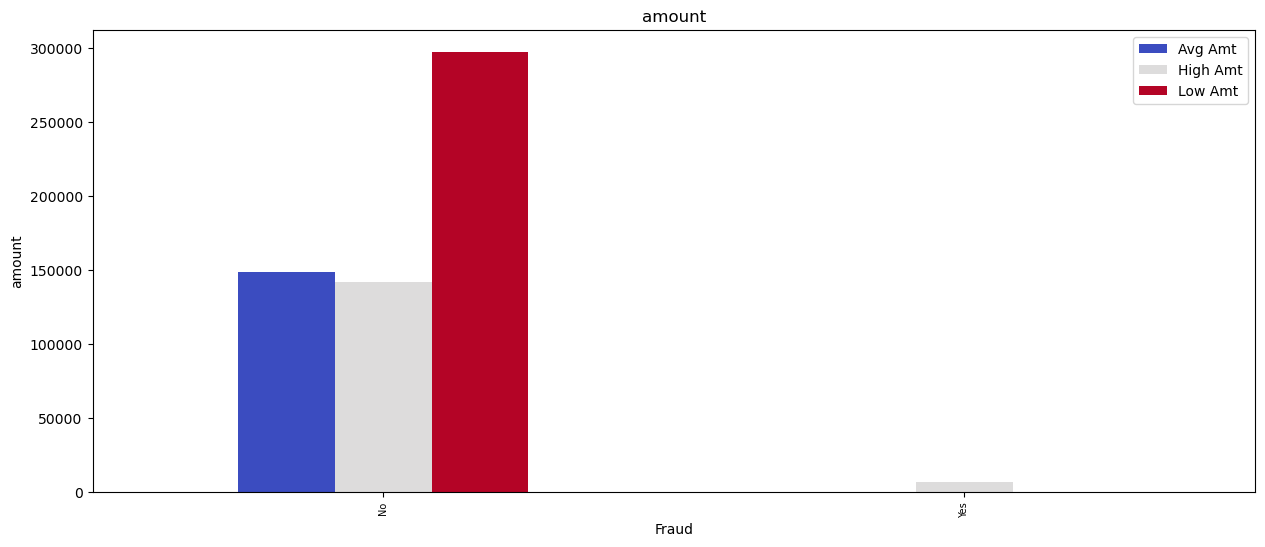

In [81]:
# Fraud vs amount
bar_charts(fraud_amt, 'amount')
plt.show()
# There is higher chances of fraud cases with high amount

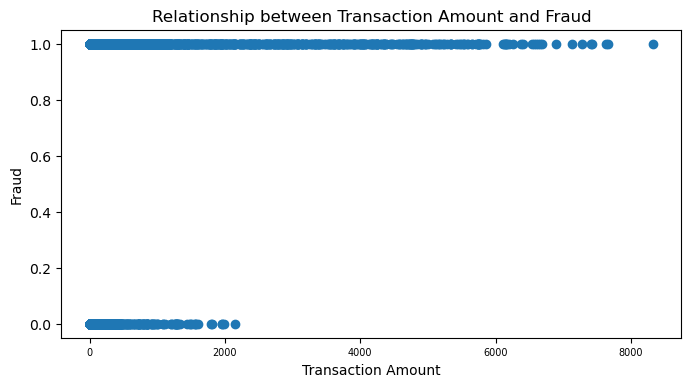

In [82]:
# Plot a scatter plot to visualize the relationship between amount and fraud
plt.scatter(fraud_csv["amount"], fraud_csv["fraud"])
plt.xlabel("Transaction Amount")
plt.ylabel("Fraud")
plt.title("Relationship between Transaction Amount and Fraud")

# Show the plot
plt.show()

## Create new dataframe and focus on fraud cases only

In [83]:
fraud_csv.columns

Index(['customer', 'age', 'gender', 'merchant', 'category', 'amount', 'fraud'], dtype='object')

In [84]:
# fraudulent(1) / benign(0)
fraud_data = fraud_csv[(fraud_csv['fraud']==1)]
fraud_data.head(1)

,customer,age,gender,merchant,category,amount,fraud
88,'C583110837','3','M','M480139044','health',44.26,1


In [85]:
# # Create function to compare 
# def bar_charts1(df, feature):
#     '''
#     Inputs:
#     df: Dataset
#     feature: Name of Feature to Check With fraud cases
#     '''
#     _agg = {
#         'age': 'count'
#     }
#     _groupby = ['category', feature]

#     df_feature = df.groupby(by=_groupby).agg(_agg)

    
#     ax = df_feature.unstack().plot(kind='bar', figsize=(15,6), cmap="Pastel1")
    
#     plt.legend(list(df_feature.index.levels[1].unique()))
#     plt.title(feature)
#     plt.xlabel('Category')
#     plt.ylabel(feature)
#     plt.xticks(np.arange(5),('health', 'hotelservices' ,'tech', 'home','travel'))  
#     plt.show()

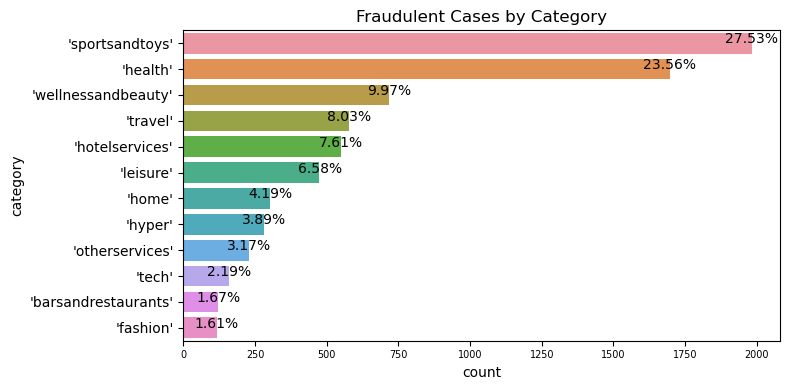

In [86]:
#These are fraudent cases with category
sns.countplot(y='category', data=fraud_data, order=fraud_data['category'].value_counts().index[:16])

#Annotate each bar with its count value
total_cases = fraud_data.shape[0]
for i in range(len(fraud_data['category'].value_counts().index[:16])):
        count = fraud_data[fraud_data['category'] == fraud_data['category'].value_counts().index[:16][i]].shape[0]
        percentage = count/total_cases*100
        plt.text(count+1, i, '{:.2f}%'.format(percentage), ha='center', fontsize=10)

plt.title('Fraudulent Cases by Category')
plt.tight_layout()

In [87]:
pd.crosstab(fraud_data.category,fraud_data.fraud,margins=True).style.background_gradient(cmap='Blues')

fraud,1,All
category,,
'barsandrestaurants',120,120
'fashion',116,116
'health',1696,1696
'home',302,302
'hotelservices',548,548
'hyper',280,280
'leisure',474,474
'otherservices',228,228
'sportsandtoys',1982,1982


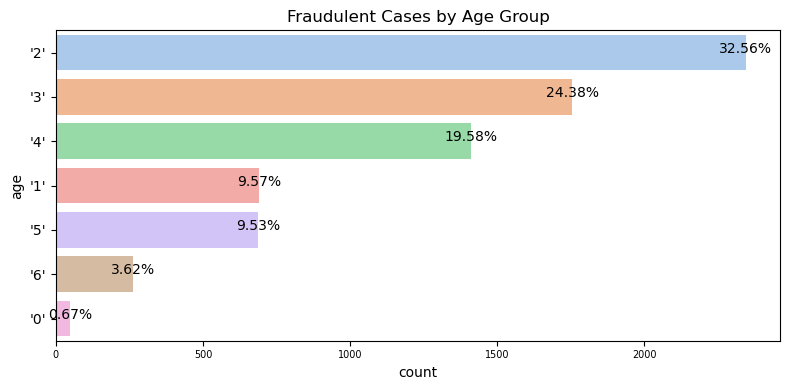

In [88]:
#These are fraudent cases with age
sns.countplot(y='age', data=fraud_data, order=fraud_data['age'].value_counts().index[:7], palette="pastel" )

#Annotate each bar with its percentage value rounded to 2 decimal places
total_count = fraud_data.shape[0]
for i in range(len(fraud_data['age'].value_counts().index[:7])):
        count = fraud_data[fraud_data['age'] == fraud_data['age'].value_counts().index[:7][i]].shape[0]
        percentage = count/total_count * 100
        plt.text(count+1, i, str(round(percentage, 2)) + '%', ha='center', fontsize=10)

plt.title('Fraudulent Cases by Age Group')
plt.tight_layout()

In [89]:
pd.crosstab(fraud_data.age,fraud_data.fraud,margins=True).style.background_gradient(cmap='Blues')

fraud,1,All
age,,
'0',48,48
'1',689,689
'2',2344,2344
'3',1755,1755
'4',1410,1410
'5',686,686
'6',261,261
'U',7,7
All,7200,7200


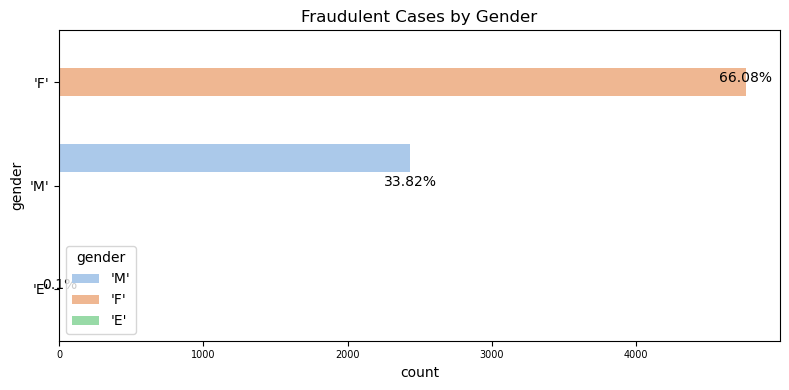

In [90]:
# These are fraudent cases with gender
sns.countplot(y='gender', data=fraud_data, order=fraud_data['gender'].value_counts().index[:16], palette="pastel", hue ='gender')

# Annotate each bar with its count value as percentage rounded to 2 decimal places
total = fraud_data.shape[0]
for i in range(len(fraud_data['gender'].value_counts().index[:7])):
    count = fraud_data[fraud_data['gender'] == fraud_data['gender'].value_counts().index[:7][i]].shape[0]
    plt.text(count+1, i, str(round(count/total*100, 2)) + "%", ha='center', fontsize=10)

plt.title('Fraudulent Cases by Gender')
plt.tight_layout()

In [91]:
pd.crosstab(fraud_data.gender,fraud_data.fraud,margins=True).style.background_gradient(cmap='Blues')

fraud,1,All
gender,,
'E',7,7
'F',4758,4758
'M',2435,2435
All,7200,7200


In [92]:
fraud_csv.columns

Index(['customer', 'age', 'gender', 'merchant', 'category', 'amount', 'fraud'], dtype='object')

In [93]:
# # Drop customer column
# fraud_csv.drop(['customer','merchant','age'],axis=1, inplace=True)

In [94]:
# Create a new dataframe
subsampled_df = fraud_csv

### Choose target variable & feature columns

In [101]:
#Target variable

target_col = 'fraud'

y = subsampled_df[target_col]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

In [102]:
# Feature columns

feature_cols = [c for c in subsampled_df.columns if c != target_col]

X = pd.DataFrame(subsampled_df[feature_cols])
X.head()

,customer,age,gender,merchant,category,amount
0,'C1093826151','4','M','M348934600','transportation',4.55
1,'C352968107','2','M','M348934600','transportation',39.68
2,'C2054744914','4','F','M1823072687','transportation',26.89
3,'C1760612790','3','M','M348934600','transportation',17.25
4,'C757503768','5','M','M348934600','transportation',35.72


In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   customer  594643 non-null  object 
 1   age       594643 non-null  object 
 2   gender    594643 non-null  object 
 3   merchant  594643 non-null  object 
 4   category  594643 non-null  object 
 5   amount    594643 non-null  float64
dtypes: float64(1), object(5)
memory usage: 27.2+ MB


### Train Test split

In [106]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42, stratify= y)

In [107]:
len(X_train)/len(subsampled_df)

0.7499995795796806

### Feature Engineering

### Convert numericals & catergorical features

In [110]:
# Get numerical columns
numerical_cols = X_train.select_dtypes(include=['float64']).columns

# Scale numerical columns using Standard Scaler
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols], y_train)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Get categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Apply Label Encoder to categorical columns
X_all = pd.concat([X_train, X_test], axis=0)
for col in categorical_cols:
    le = LabelEncoder()
    X_all[col] = le.fit_transform(X_all[col])

# Split the transformed data back into training and test sets
X_train = X_all[:X_train.shape[0]]
X_test = X_all[X_train.shape[0]:]

### Merge X & y into dataframe for correlation 

In [119]:
# Merge X and y into a new dataframe
df_train = pd.DataFrame(X_train, columns=['customer', 'age', 'gender', 'merchant', 'category', 'amount'])
df_train['fraud'] = y_train

In [120]:
df_train

,customer,age,gender,merchant,category,amount,fraud
278490,2516,1,2,30,12,0.210237,0
135117,457,3,2,18,12,-0.021196,0
270476,471,2,2,18,12,0.158818,0
481204,1142,2,2,18,12,-0.275360,0
492688,3683,3,2,30,12,-0.168855,0
...,...,...,...,...,...,...,...
52982,1674,2,1,30,12,-0.240164,0
219940,154,4,1,45,3,-0.090580,0
20419,977,3,2,18,12,-0.056576,0
497957,2539,6,2,45,3,-0.311565,0


### Pairplot

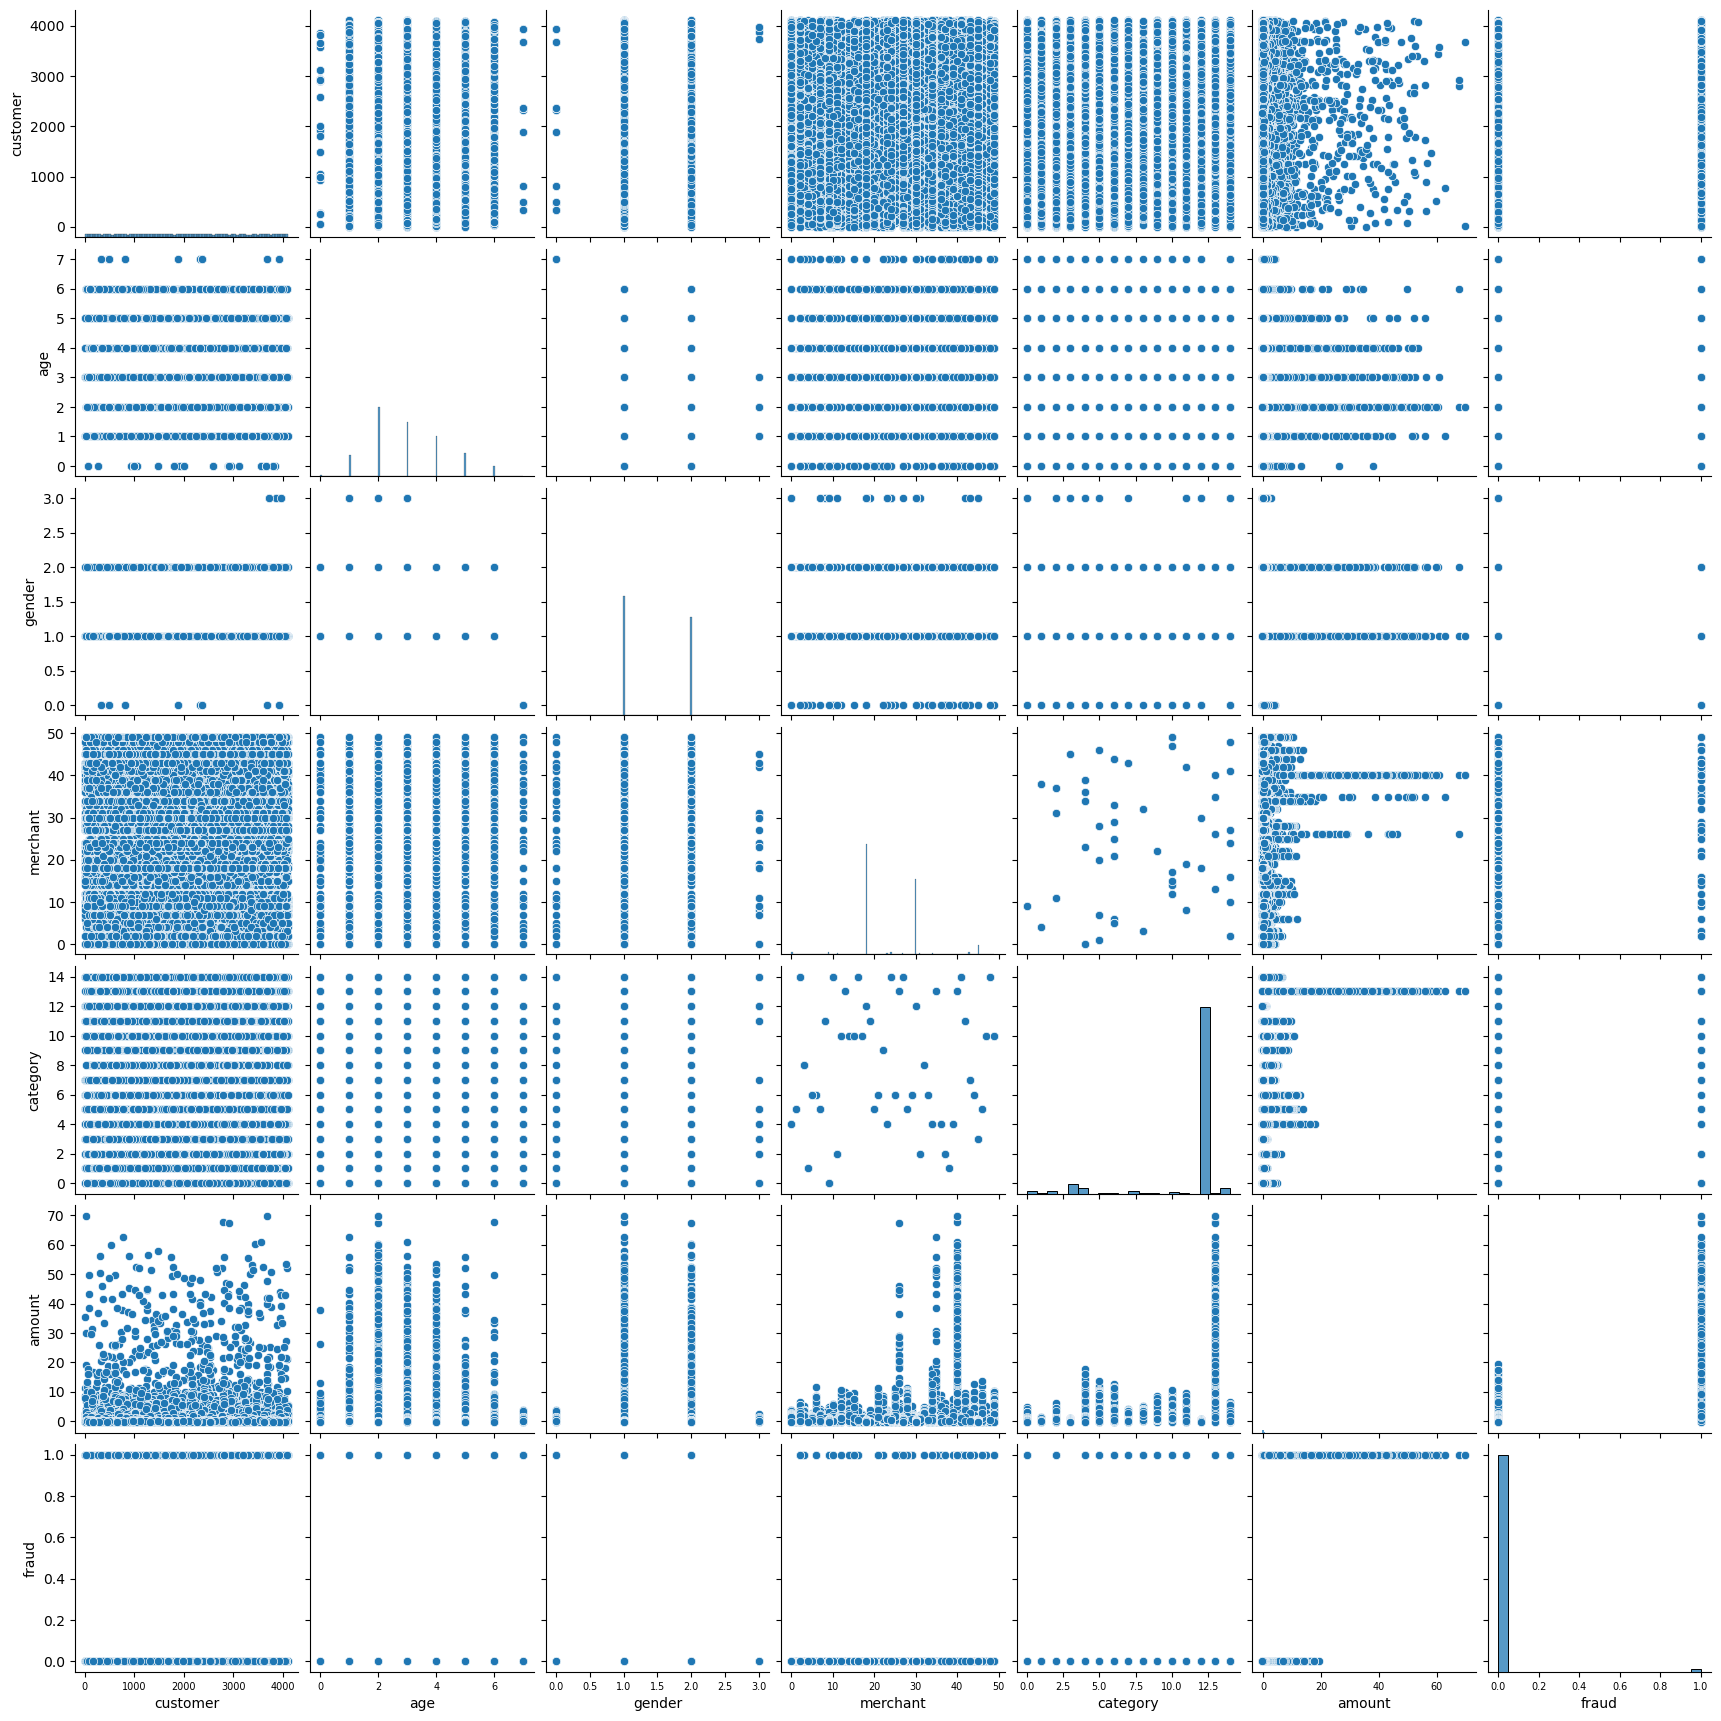

In [121]:
sns.pairplot(df_train)

### Heat map

In [122]:
corr = df_train.corr()

<AxesSubplot: >

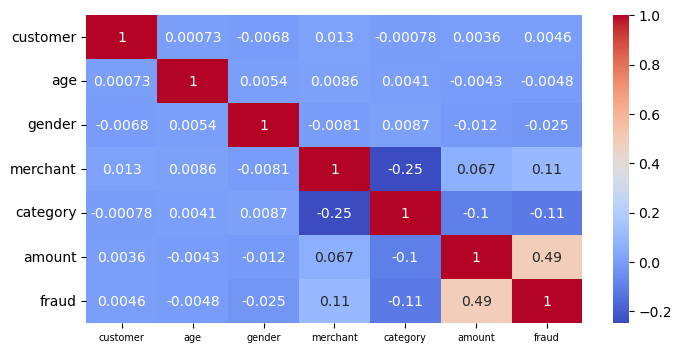

In [123]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

### SMOTE

In [124]:
# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train))

### SMOTE Tomek

In [125]:
# Resample the data using SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({0: 440444, 1: 440444})


### Baseline Accuracy Score

In [1]:
# Calculate the frequency of the most frequent class
baseline = np.max(np.bincount(y)) / len(y)

# Print the baseline accuracy score
print("Baseline accuracy: {:.2f}".format(baseline))

NameError: name 'np' is not defined

In [127]:
# Calculate the frequency of the most frequent class
baseline = y.value_counts(normalize=True).max()

# Print the baseline accuracy score
print("Baseline accuracy: {:.2f}".format(baseline))

Baseline accuracy: 0.99


### A1: Logistic Regression Model

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### Using RFE for feature selection

In [130]:
# number of features to select
n_features_to_select = 3

# create RFE object
rfe = RFE(estimator=LogisticRegression(max_iter = 500), n_features_to_select=n_features_to_select)

# fit RFE to the data
rfe.fit(X_train, y_train)

# get the selected features
selected_features = rfe.support_

# print RFE scores
print("RFE scores:", rfe.ranking_)

# find the selected features
selected_features_index = [i for i, x in enumerate(rfe.support_) if x]
selected_features = X.columns[selected_features_index]
print("Selected features:", selected_features)

RFE scores: [4 1 1 3 2 1]
Selected features: Index(['age', 'gender', 'amount'], dtype='object')


In [131]:
# Get the selected features
selected_features = X_train.columns[rfe.get_support()]


# Train the SVC model using the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

lr = LogisticRegression(max_iter = 500)
# Fit Model
lr.fit(X_train, y_train)


# Evaluate the model on the test set
score = lr.score(X_test, y_test)
print("Test score with selected features: {:.3f}".format(score))

Test score with selected features: 0.971


### hyperparameter tuning

In [132]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 300, 400, 500]}

# Define the model
lr = LogisticRegression(random_state=42, solver='liblinear')

# Create the GridSearchCV object
grid_model = GridSearchCV(lr, param_grid, cv=5)

# Fit the GridSearchCV object to the datawhat 
lr = grid_model.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_model.best_params_)
print("Best score:", grid_model.best_score_)

Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Best score: 0.9453517366619817


### Evaluate

In [133]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [134]:
# predicted test probability:
y_proba_predict = lr.predict_proba(X_test)

In [135]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)

Accuracy Score:  0.9708195155420722


In [139]:
# Get the classification report
cr = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a pandas DataFrame
cr_lr = pd.DataFrame(cr).T

# Print the DataFrame
cr_lr.round(2).style.background_gradient(cmap = 'Purples')

,precision,recall,f1-score,support
0,1.000000,0.970000,0.990000,146861.000000
1,0.270000,0.840000,0.410000,1800.000000
accuracy,0.970000,0.970000,0.970000,0.970000
macro avg,0.640000,0.910000,0.700000,148661.000000
weighted avg,0.990000,0.970000,0.980000,148661.000000


In [142]:
cm = confusion_matrix(y_test, y_pred)

In [144]:
# Confusion matrix
confusion = pd.DataFrame(cm, index=['predicted_non-fraud','predicted_fraud'],
                         columns=['is_non-fraud', 'is_fraud'])
confusion

,is_non-fraud,is_fraud
predicted_non-fraud,142808,4053
predicted_fraud,285,1515


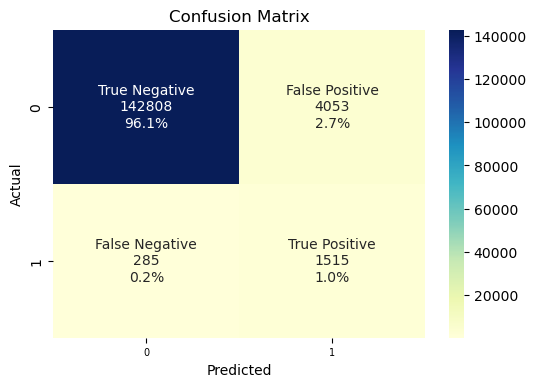

In [145]:
# Select Confusion Matrix Size
plt.figure(figsize = (6,4))

# Set names to show in boxes
classes = ["True Negative","False Positive","False Negative","True Positive"]

# Set values format
values = ["{0:0.0f}".format(x) for x in cm.flatten()]

# Find percentages and set format
percentages = ["{0:.1%}".format(x) for x in cm.flatten()/np.sum(cm)]

# Combine classes, values and percentages to show 
combined = [f"{i}\n{j}\n{k}" for i, j, k in zip(classes, values, percentages)]
combined = np.asarray(combined).reshape(2,2)

# Create Confusion Matrix
b = sns.heatmap(cm, annot=combined, fmt="", cmap='YlGnBu')

# Set the Title
b.set(title='Confusion Matrix')

# Set the Labels
b.set(xlabel='Predicted', ylabel='Actual')

# Display the Confusion Matrix
plt.show()

### Plot RUC, AUC curve

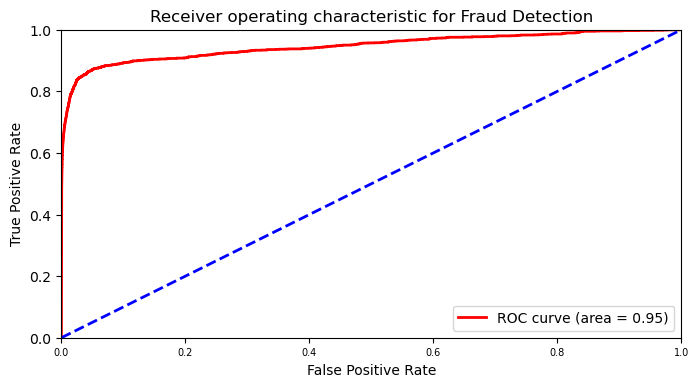

In [146]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = lr.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph

fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric

roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'blue', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Fraud Detection')
plt.legend(loc = "lower right")
plt.show()


### Learning Curve

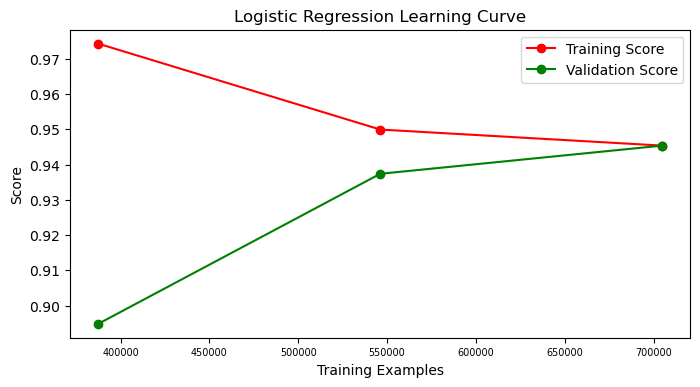

In [147]:
# Create the learning curve
train_sizes, train_scores, valid_scores = learning_curve(lr, X_train, y_train, cv=5)

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color='g', label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.title('Logistic Regression Learning Curve')
plt.show()

# Naive Bayes 

Use Naive Bayes and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### Using  RFE for feature selection

In [148]:
# number of features to select
n_features_to_select = 3

# create RFE object
rfe = RFE(estimator=GaussianNB(), n_features_to_select=n_features_to_select)

# fit RFE to the data
rfe.fit(X_train, y_train)

# get the selected features
selected_features = rfe.support_

# print RFE scores
print("RFE scores:", rfe.ranking_)

# find the selected features
selected_features_index = [i for i, x in enumerate(rfe.support_) if x]
selected_features = X.columns[selected_features_index]
print("Selected features:", selected_features)

RFE scores: [1 1 1]
Selected features: Index(['customer', 'age', 'gender'], dtype='object')


In [149]:
# Get the selected features
selected_features = X_train.columns[rfe.get_support()]

In [150]:
# Train the SVC model using the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

gnb = GaussianNB()
# Fit Model
gnb.fit(X_train, y_train)


# Evaluate the model on the test set
score = gnb.score(X_test, y_test)
print("Test score with selected features: {:.3f}".format(score))

Test score with selected features: 0.978


#### Hyperparameter tuning

In [151]:
# Create the classifier
gnb = GaussianNB()

# Define the parameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

# Create a scoring function using accuracy
scorer = make_scorer(accuracy_score)

# Create the grid search object
grid_search = GridSearchCV(gnb, param_grid, scoring=scorer)

# Fit the grid search to the data
gnb = grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.3f}".format(grid_search.best_score_))

Best parameters: {'var_smoothing': 1e-06}
Best score: 0.936


### Evaluate

In [152]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [153]:
# predicted test probability:
y_proba_predict = gnb.predict_proba(X_test)

In [154]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)

Accuracy Score:  0.9779969191650802


In [155]:
# Get the classification report
cr = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a pandas DataFrame
cr_nb = pd.DataFrame(cr).T

# Print the DataFrame
cr_nb.style.background_gradient(cmap = 'Purples')

,precision,recall,f1-score,support
0,0.997657,0.980029,0.988764,146861.000000
1,0.332651,0.812222,0.471994,1800.000000
accuracy,0.977997,0.977997,0.977997,0.977997
macro avg,0.665154,0.896125,0.730379,148661.000000
weighted avg,0.989605,0.977997,0.982507,148661.000000


In [156]:
# report = classification_report(y_test, y_pred, labels=[0,1], target_names=["non-fraud", "fraud"], output_dict=True)

# # extract specific metrics from report
# precision = report["fraud"]["precision"]
# recall = report["fraud"]["recall"]
# f1_score = report["fraud"]["f1-score"]

# # print custom report
# print("Precision: {:.2f}".format(precision))
# print("Recall: {:.2f}".format(recall))
# print("F1-Score: {:.2f}".format(f1_score))

In [157]:
# Confusion Matrix
confusion = pd.DataFrame(cm, index=['predicted_non-fraud','predicted_fraud'],
                         columns=['is_non-fraud', 'is_fraud'])
confusion

,is_non-fraud,is_fraud
predicted_non-fraud,142808,4053
predicted_fraud,285,1515


In [158]:
cm = confusion_matrix(y_test, y_pred)

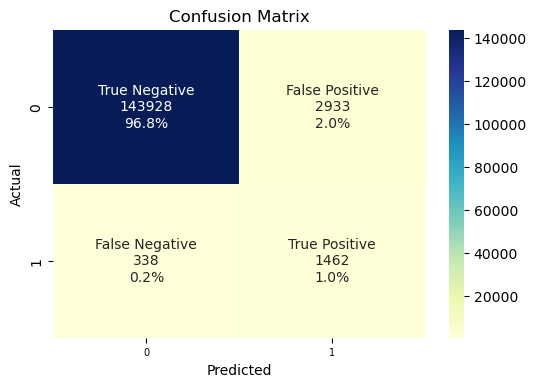

In [159]:
# Select Confusion Matrix Size
plt.figure(figsize = (6,4))

# Set names to show in boxes
classes = ["True Negative","False Positive","False Negative","True Positive"]

# Set values format
values = ["{0:0.0f}".format(x) for x in cm.flatten()]

# Find percentages and set format
percentages = ["{0:.1%}".format(x) for x in cm.flatten()/np.sum(cm)]

# Combine classes, values and percentages to show 
combined = [f"{i}\n{j}\n{k}" for i, j, k in zip(classes, values, percentages)]
combined = np.asarray(combined).reshape(2,2)

# Create Confusion Matrix
b = sns.heatmap(cm, annot=combined, fmt="", cmap='YlGnBu')

# Set the Title
b.set(title='Confusion Matrix')

# Set the Labels
b.set(xlabel='Predicted', ylabel='Actual')

# Display the Confusion Matrix
plt.show()

### ROC, AUC curve

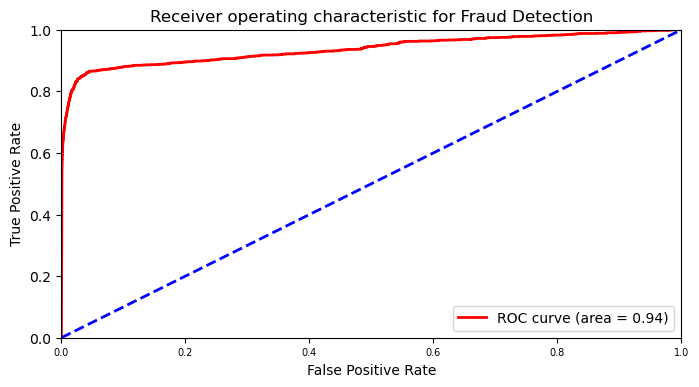

In [160]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = gnb.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph

fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric

roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'blue', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Fraud Detection')
plt.legend(loc = "lower right")
plt.show()

### Learning curve

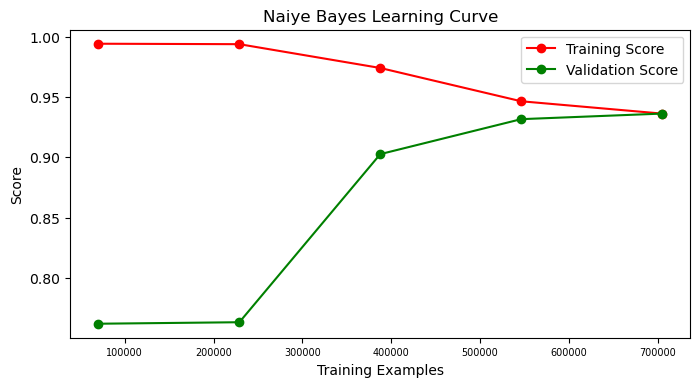

In [161]:
# Create the learning curve
train_sizes, train_scores, valid_scores = learning_curve(gnb, X_train, y_train, cv=5)

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color='g', label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.title('Naiye Bayes Learning Curve')
plt.show()

# KNeighborsClassifier

Use KNeighborsClassifier and examine accuracy score, confusion matrix, classification report for that model.

- Define Target, Predictors
- Train-Test Split
- Evaluate Model

### Using RFE for feature selection

In [162]:
# number of features to select
n_features_to_select = 3

# create RFE object
rfe = RFE(estimator=KNeighborsClassifier(), n_features_to_select=n_features_to_select)

# fit RFE to the data
rfe.fit(X_train, y_train)

# get the selected features
selected_features = rfe.support_

# print RFE scores
print("RFE scores:", rfe.ranking_)

# find the selected features
selected_features_index = [i for i, x in enumerate(rfe.support_) if x]
selected_features = X.columns[selected_features_index]
print("Selected features:", selected_features)

RFE scores: [1 1 1]
Selected features: Index(['customer', 'age', 'gender'], dtype='object')


In [163]:
# Get the selected features
selected_features = X_train.columns[rfe.get_support()]

# Train the SVC model using the selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

knn = KNeighborsClassifier()

# Fit Model
knn.fit(X_train, y_train)

# Evaluate the model on the test set
score = knn.score(X_test, y_test)
print("Test score with selected features: {:.3f}".format(score))

Test score with selected features: 0.952


### Hyperparameter tuning

In [164]:
# Define the grid of values for the parameters
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19], 'weights': ['uniform', 'distance']}

# Create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_n_neighbors = grid_search.best_params_['n_neighbors']
best_weights = grid_search.best_params_['weights']

# Train a KNN model with the best hyperparameters
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

### Evaluate

In [165]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [166]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)

Accuracy Score:  0.9569961186861382


In [167]:
# Get the classification report
cr = classification_report(y_test, y_pred, output_dict=True)

# Convert the classification report to a pandas DataFrame
cr_knn = pd.DataFrame(cr).T

# Print the DataFrame
cr_knn.style.background_gradient(cmap = 'Purples')


,precision,recall,f1-score,support
0,0.998149,0.958246,0.977791,146861.000000
1,0.200626,0.855000,0.324992,1800.000000
accuracy,0.956996,0.956996,0.956996,0.956996
macro avg,0.599387,0.906623,0.651391,148661.000000
weighted avg,0.988492,0.956996,0.969886,148661.000000


In [168]:
# report = classification_report(y_test, y_pred, labels=[0,1], target_names=["non-fraud", "fraud"], output_dict=True)

# # extract specific metrics from report
# precision = report["fraud"]["precision"]
# recall = report["fraud"]["recall"]
# f1_score = report["fraud"]["f1-score"]

# # print custom report
# print("Precision: {:.2f}".format(precision))
# print("Recall: {:.2f}".format(recall))
# print("F1-Score: {:.2f}".format(f1_score))

In [169]:
cm = confusion_matrix(y_test, y_pred)

In [170]:
# Confusion Matrix
confusion = pd.DataFrame(cm, index=['predicted_non-fraud','predicted_fraud'],
                         columns=['is_non-fraud', 'is_fraud'])
confusion

,is_non-fraud,is_fraud
predicted_non-fraud,140729,6132
predicted_fraud,261,1539


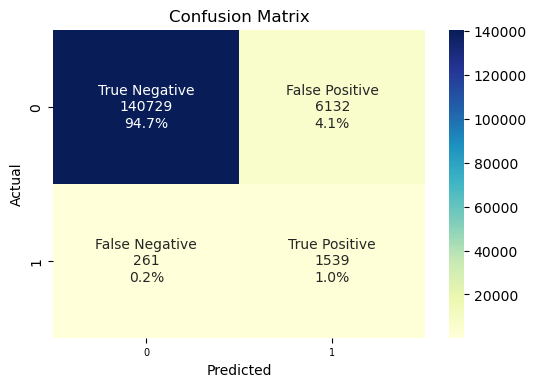

In [171]:
# Select Confusion Matrix Size
plt.figure(figsize = (6,4))

# Set names to show in boxes
classes = ["True Negative","False Positive","False Negative","True Positive"]

# Set values format
values = ["{0:0.0f}".format(x) for x in cm.flatten()]

# Find percentages and set format
percentages = ["{0:.1%}".format(x) for x in cm.flatten()/np.sum(cm)]

# Combine classes, values and percentages to show 
combined = [f"{i}\n{j}\n{k}" for i, j, k in zip(classes, values, percentages)]
combined = np.asarray(combined).reshape(2,2)

# Create Confusion Matrix
b = sns.heatmap(cm, annot=combined, fmt="", cmap='YlGnBu')

# Set the Title
b.set(title='Confusion Matrix')

# Set the Labels
b.set(xlabel='Predicted', ylabel='Actual')

# Display the Confusion Matrix
plt.show()

### ROC AUC Curve

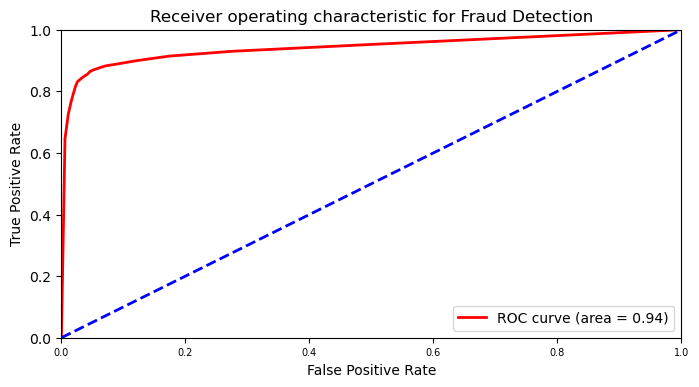

In [172]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = knn.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph

fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric

roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'blue', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Fraud Detection')
plt.legend(loc = "lower right")
plt.show()

### Learning Curve

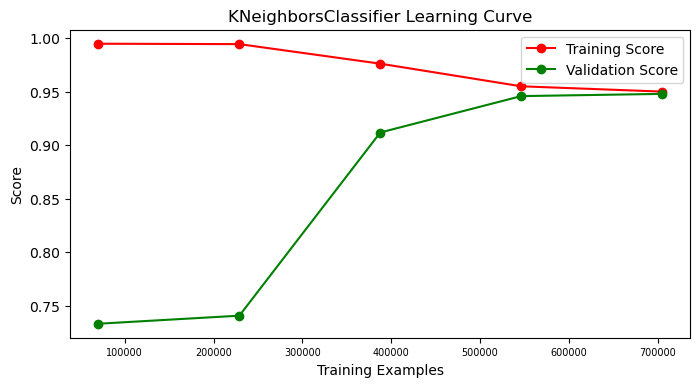

In [173]:
# Create the learning curve
train_sizes, train_scores, valid_scores = learning_curve(knn, X_train, y_train, cv=5)

# Plot the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color='g', label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend()
plt.title('KNeighborsClassifier Learning Curve')
plt.show()

## Merge classification report

In [180]:
report1 = {'precision': [1.0000, 0.2700], 'recall': [0.9700, 0.8400], 'f1-score': [0.9900, 0.4100], 'support': [146861.0, 1800.0]}
report2 = {'precision': [0.99765, 0.33265], 'recall': [0.98002, 0.81222], 'f1-score': [0.98876, 0.47199], 'support': [146861.0, 1800.0]}
report3 = {'precision': [0.99814, 0.20062], 'recall': [0.95824, 0.855], 'f1-score': [0.97779, 0.32499], 'support': [146861.0, 1800.0]}

df1 = pd.DataFrame(report1, index=[0,1])
df2 = pd.DataFrame(report2, index=[0,1])
df3 = pd.DataFrame(report3, index=[0,1])

df_merged = pd.concat([df1, df2, df3], axis=1, keys=['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors'])

In [181]:
df_merged

Logistic Regression                           Naive Bayes                    \
            precision recall f1-score   support   precision   recall f1-score   
0                1.00   0.97     0.99  146861.0     0.99765  0.98002  0.98876   
1                0.27   0.84     0.41    1800.0     0.33265  0.81222  0.47199   

            K-Nearest Neighbors                              
    support           precision   recall f1-score   support  
0  146861.0             0.99814  0.95824  0.97779  146861.0  
1    1800.0             0.20062  0.85500  0.32499    1800.0